In [21]:
import json
import requests
import pandas
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime

In [22]:
stock =input()
#name ticker
stock

MO


'MO'

In [23]:
url = "https://query1.finance.yahoo.com/v7/finance/quote"

user_agent_headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

headers=user_agent_headers
headers
querystring = querystring = {"symbols":stock}


In [24]:
response = requests.request("GET", url, headers=headers, params=querystring)

In [25]:
stock_json1 = response.json()

In [26]:
#handle errors
if len(stock_json1['quoteResponse']['result']) == 0:
    print("Stock does not exist.")

In [27]:
#stock full name
stock_json1['quoteResponse']['result'][0]['longName']

'Altria Group, Inc.'

In [28]:
url2="https://query1.finance.yahoo.com/v10/finance/quoteSummary/"
query_str = {"symbol": stock, "modules":"financialData"}

response = requests.request("GET",url2, headers=headers,params=query_str)

stock_json2 = response.json()

In [29]:
#current price
stock_json2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw']

44.48

In [30]:
#target mean price
stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw']

48.7

In [31]:
#cash on hand
stock_json2['quoteSummary']['result'][0]['financialData']['totalCash']['raw']

2567000064

In [32]:
#profit margins
stock_json2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw']

0.08453

In [33]:
#date pulled 
today = datetime.today().strftime('%Y-%m-%d')

In [34]:
#store in JSON 
data = {"Name Ticker" : stock, "Full Name of Stock" : stock_json1['quoteResponse']['result'][0]['longName'],
        "Current Price" : stock_json2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw'],
        "Target Mean Price" : stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'],
        "Cash on Hand" : stock_json2['quoteSummary']['result'][0]['financialData']['totalCash']['raw'],
        "Profit Margins" : stock_json2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw'],
        "Date Pulled" : today}

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


<AxesSubplot:title={'center':'Highest Value of MO Price Over Past 5 Days'}, xlabel='Date'>

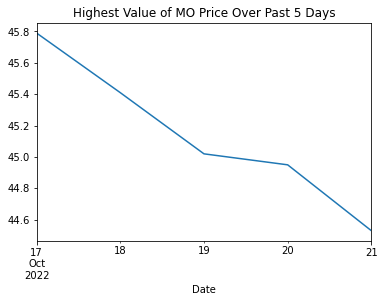

In [16]:
#bonus 
import datetime
import yfinance as yf
from yahoofinancials import YahooFinancials

start_date = (datetime.datetime.now() - datetime.timedelta(days = 5)).date()
end_date = datetime.datetime.now().date()

time_data = yf.download(stock,
                        start = start_date,
                        end = end_date,
                        progress = False
                        )

time_data['High'].plot(title = f'Highest Value of {stock} Price Over Past 5 Days')